<a href="https://colab.research.google.com/github/FarhodjonJaborov/Generative-AI-Case/blob/main/DataHack_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from keras.models import Sequential
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, UpSampling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DataHack/german_credit_data_target.csv', index_col = 0)
loans = pd.read_csv('/content/drive/MyDrive/DataHack/loans_full_schema.csv')

# Data - German_Credit_Target

In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
data['Sex'].value_counts()
data['Housing'].value_counts()
data['Saving accounts'].value_counts()
data['Checking account'].value_counts()
data['Purpose'].value_counts()
data['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [ ]:
data = data.replace({'Sex':{'male': 1, 'female': 0}, 'Housing':{'free': 0 , 'rent': 1 , 'own': 2}, 'Saving accounts': {'little':1, 'moderate': 0 , 'quite rich': 3, 'rich': 2}, 'Checking account': {'moderate': 0, 'little': 1, 'rich': 2}, 'Risk':{'bad': 0, 'good': 1}})

In [ ]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
data = data.fillna(method = 'ffill')

In [ ]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     1
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
data.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,0.690000,1.904000,1.605000,1.080080,0.630000,3271.258000,20.903000,0.700000
std,11.375469,0.462725,0.653614,0.674856,0.691774,0.641492,2822.736876,12.058814,0.458487
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1365.500000,12.000000,0.000000
50%,33.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2319.500000,18.000000,1.000000
75%,42.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3972.250000,24.000000,1.000000
max,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,1.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(1000, 10)

In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,NaN,1.0,1169,6,radio/TV,1
1,22,0,2,2,1.0,0.0,5951,48,radio/TV,0
2,49,1,1,2,1.0,0.0,2096,12,education,1
3,45,1,2,0,1.0,1.0,7882,42,furniture/equipment,1
4,53,1,2,0,1.0,1.0,4870,24,car,0


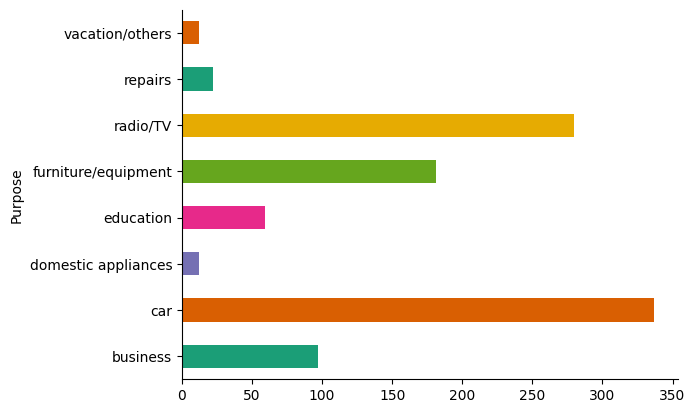

In [ ]:
data.groupby('Purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Loans - Loans_full_schema

In [ ]:
loans.tail()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0
9999,operations analyst,3.0,CT,RENT,66000.0,Not Verified,20.82,NaN,NaN,NaN,...,B4,Feb-2018,Current,whole,Cash,11574.83,1658.56,1225.17,433.39,0.0


In [ ]:
loans.shape

(10000, 55)

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [ ]:
loans.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [ ]:
loans['emp_title'].value_counts()
loans['loan_purpose'].value_counts()
loans['grade'].value_counts()
loans['state'].value_counts()
loans['sub_grade'].value_counts()

loans['homeownership'].value_counts()
loans['verified_income'].value_counts()
loans['verification_income_joint'].value_counts()
loans['application_type'].value_counts()
loans['issue_month'].value_counts()
loans['initial_listing_status'].value_counts()
loans['disbursement_method'].value_counts()
loans['loan_status'].value_counts()

loan_status
Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: count, dtype: int64

In [ ]:
loans = loans.replace({'homeownership':{'RENT':1 , 'OWN': 2, 'MORTGAGE': 0}, 'verified_income': {'Not Verified': 0, 'Verified':1, 'Source Verified': 2},
                       'verification_income_joint':{'Not Verified':0, 'Verified':1, 'Source Verified': 2}, 'application_type': {'individual':1, 'joint':0},
                       'issue_month': {'Feb-2018':0, 'Mar-2018': 1, 'Jan-2018':2}, 'initial_listing_status':{'whole':1 , 'fractional':0},
                       'disbursement_method':{'Cash':1, 'DirectPay':0}, 'loan_status':{'Current': 1, 'Charged Off':0, 'Late (16-30 days)':2,'Late (31-120 days)':3, 'In Grace Period':4, 'Fully Paid':5}})

In [ ]:
loans.isnull().sum()/len(loans)*100

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts      

In [ ]:
loans = loans.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_90d_late'], axis=1)

In [ ]:
loans.shape

(10000, 51)

In [ ]:
loans = loans.fillna(method='ffill')

In [ ]:
loans.isnull().sum()/len(loans)*100

emp_title                           0.0
emp_length                          0.0
state                               0.0
homeownership                       0.0
annual_income                       0.0
verified_income                     0.0
debt_to_income                      0.0
delinq_2y                           0.0
months_since_last_delinq            0.0
earliest_credit_line                0.0
inquiries_last_12m                  0.0
total_credit_lines                  0.0
open_credit_lines                   0.0
total_credit_limit                  0.0
total_credit_utilized               0.0
num_collections_last_12m            0.0
num_historical_failed_to_pay        0.0
current_accounts_delinq             0.0
total_collection_amount_ever        0.0
current_installment_accounts        0.0
accounts_opened_24m                 0.0
months_since_last_credit_inquiry    0.0
num_satisfactory_accounts           0.0
num_accounts_120d_past_due          0.0
num_accounts_30d_past_due           0.0


In [ ]:
loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,0,90000.0,1,18.01,0,38.0,2001,...,C3,1,1,1,1,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,1,40000.0,0,5.04,0,38.0,1996,...,C1,0,1,1,1,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,1,40000.0,2,21.15,0,28.0,2006,...,D1,0,1,0,1,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,1,30000.0,0,10.16,0,28.0,2007,...,A3,2,1,1,1,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,1,35000.0,1,57.96,0,28.0,2008,...,C3,1,1,1,1,21430.15,2324.65,1569.85,754.80,0.0


# CTGAN - Data

In [ ]:
!pip install ctgan

In [ ]:
!pip install table_evaluator

In [ ]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,2,NaN,1.0,1169,6,radio/TV,1
1,1,22,0,2,2,1.0,0.0,5951,48,radio/TV,0
2,2,49,1,1,2,1.0,0.0,2096,12,education,1
3,3,45,1,2,0,1.0,1.0,7882,42,furniture/equipment,1
4,4,53,1,2,0,1.0,1.0,4870,24,car,0


In [ ]:
data.shape

(1000, 11)

In [ ]:
from ctgan import CTGAN

In [ ]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
discrete_columns = [
    'Unnamed: 0',
    'Age',
    'Sex',
    'Job',
    'Housing',
    'Saving accounts',
    'Checking account',
    'Credit amount',
    'Duration',
    'Purpose',
    'Risk'
]

In [ ]:
ctgan = CTGAN(epochs=100)
ctgan.fit(data, discrete_columns)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
synthetic_data = ctgan.sample(1000)

In [ ]:
synthetic_data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,372,65,1,2,0,1.0,1.0,1413,24,radio/TV,1
1,176,32,1,3,2,1.0,1.0,1188,36,radio/TV,1
2,897,27,1,1,1,1.0,1.0,5045,15,car,1
3,642,45,0,2,2,1.0,1.0,1940,24,car,1
4,293,28,0,2,0,1.0,1.0,1169,36,radio/TV,1
...,...,...,...,...,...,...,...,...,...,...,...
995,492,43,1,2,2,1.0,1.0,2910,20,car,1
996,606,33,1,1,0,0.0,2.0,2134,24,furniture/equipment,1
997,932,37,1,2,1,1.0,1.0,6361,6,car,1
998,448,35,1,2,2,1.0,1.0,1098,9,car,1


(1000, 11) (1000, 11)


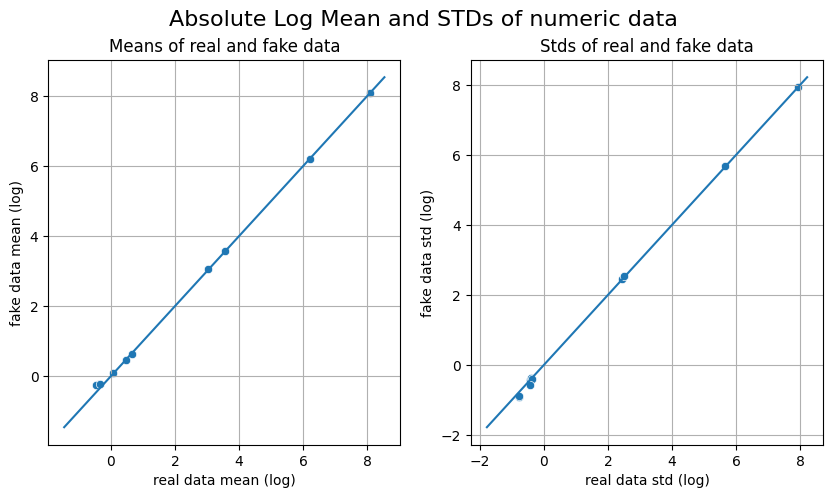

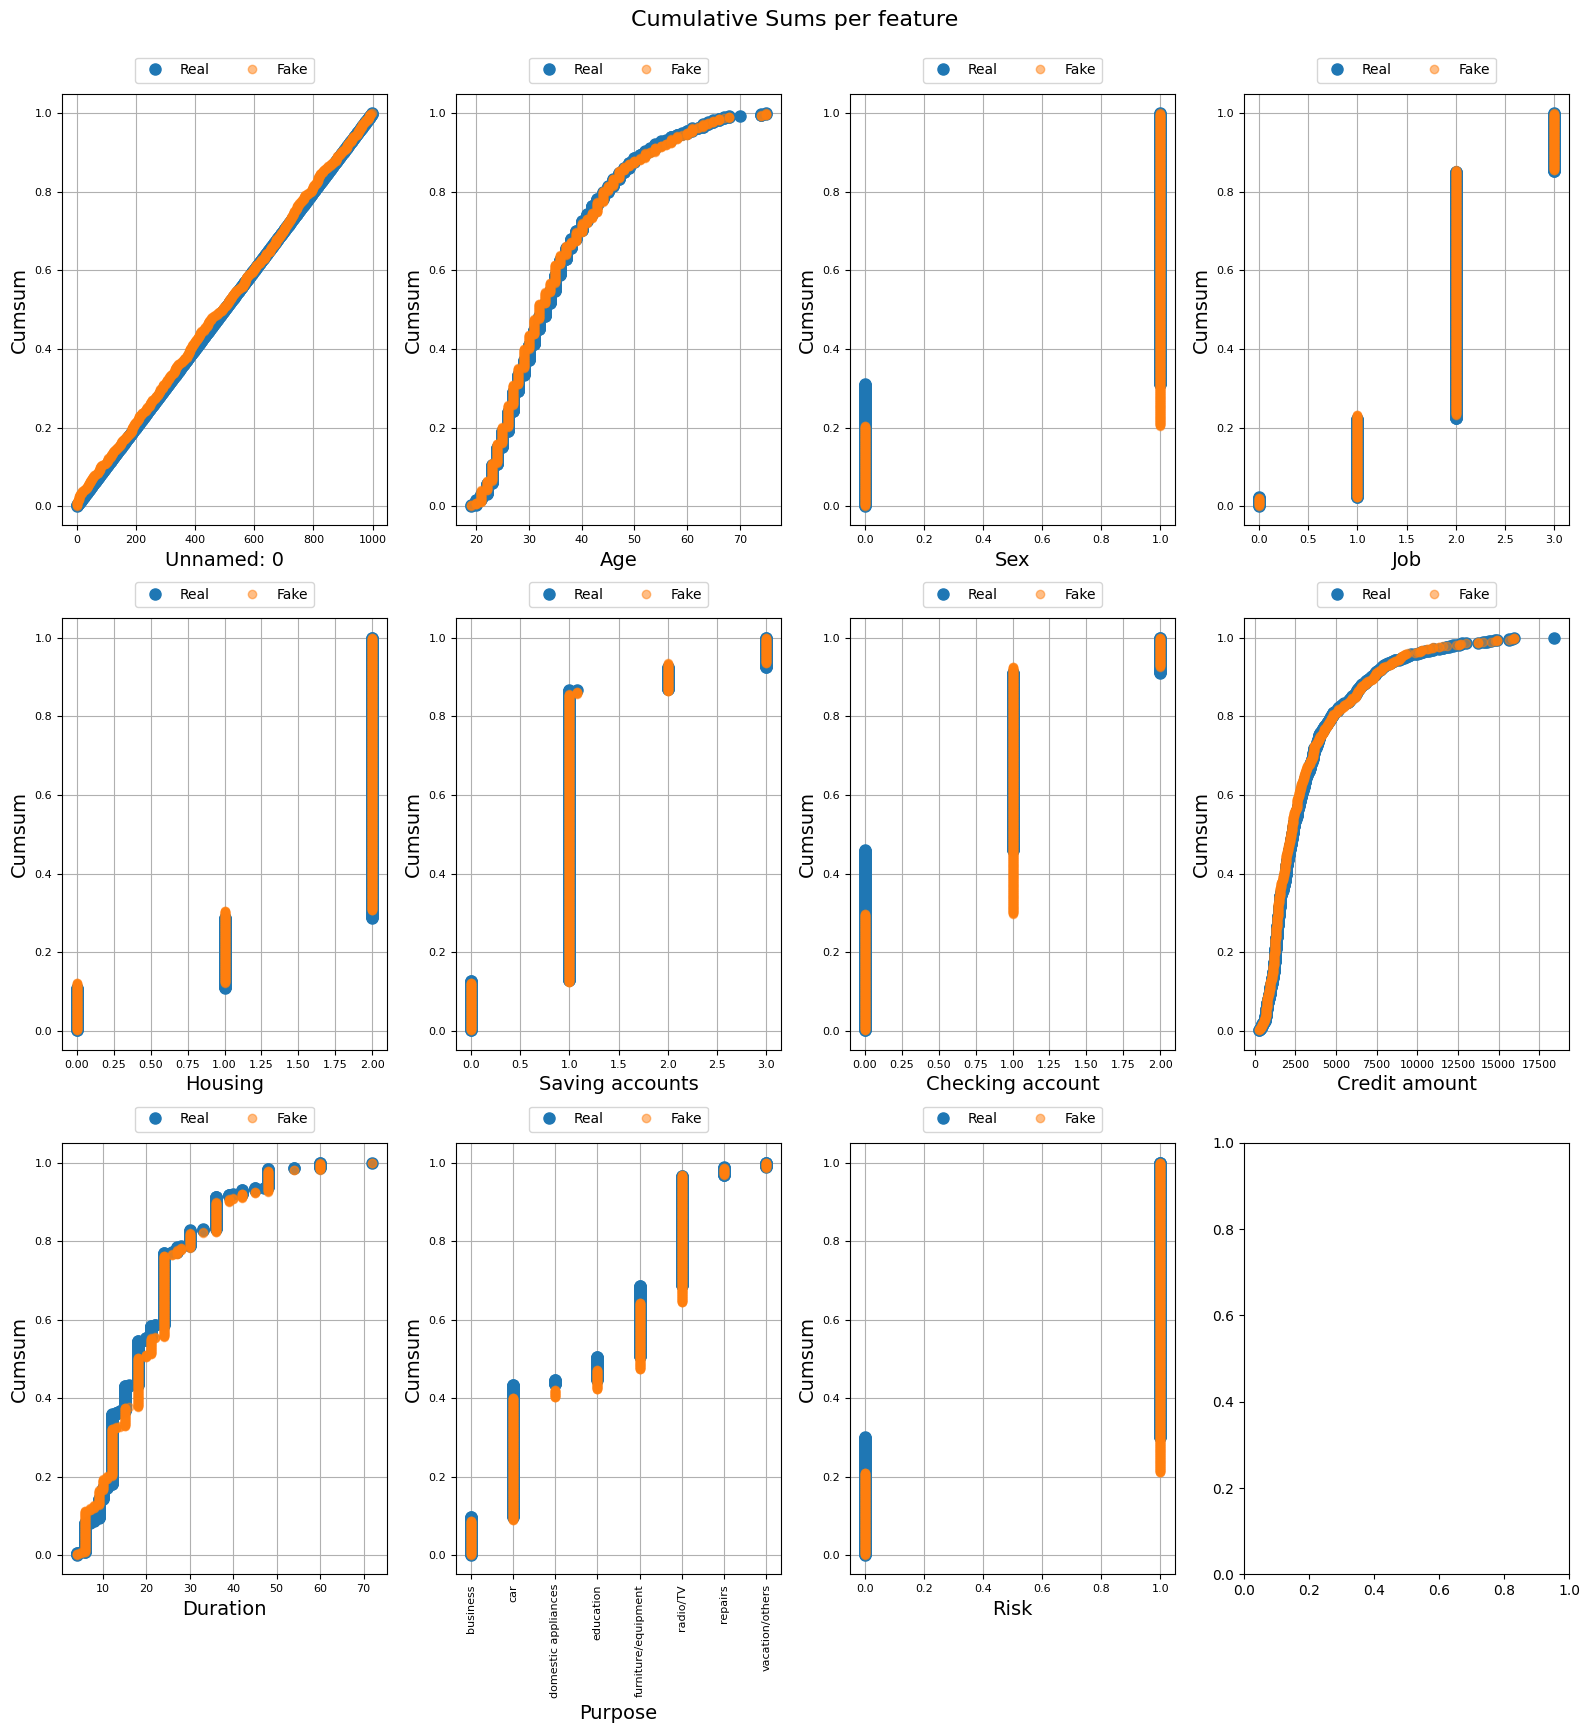

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


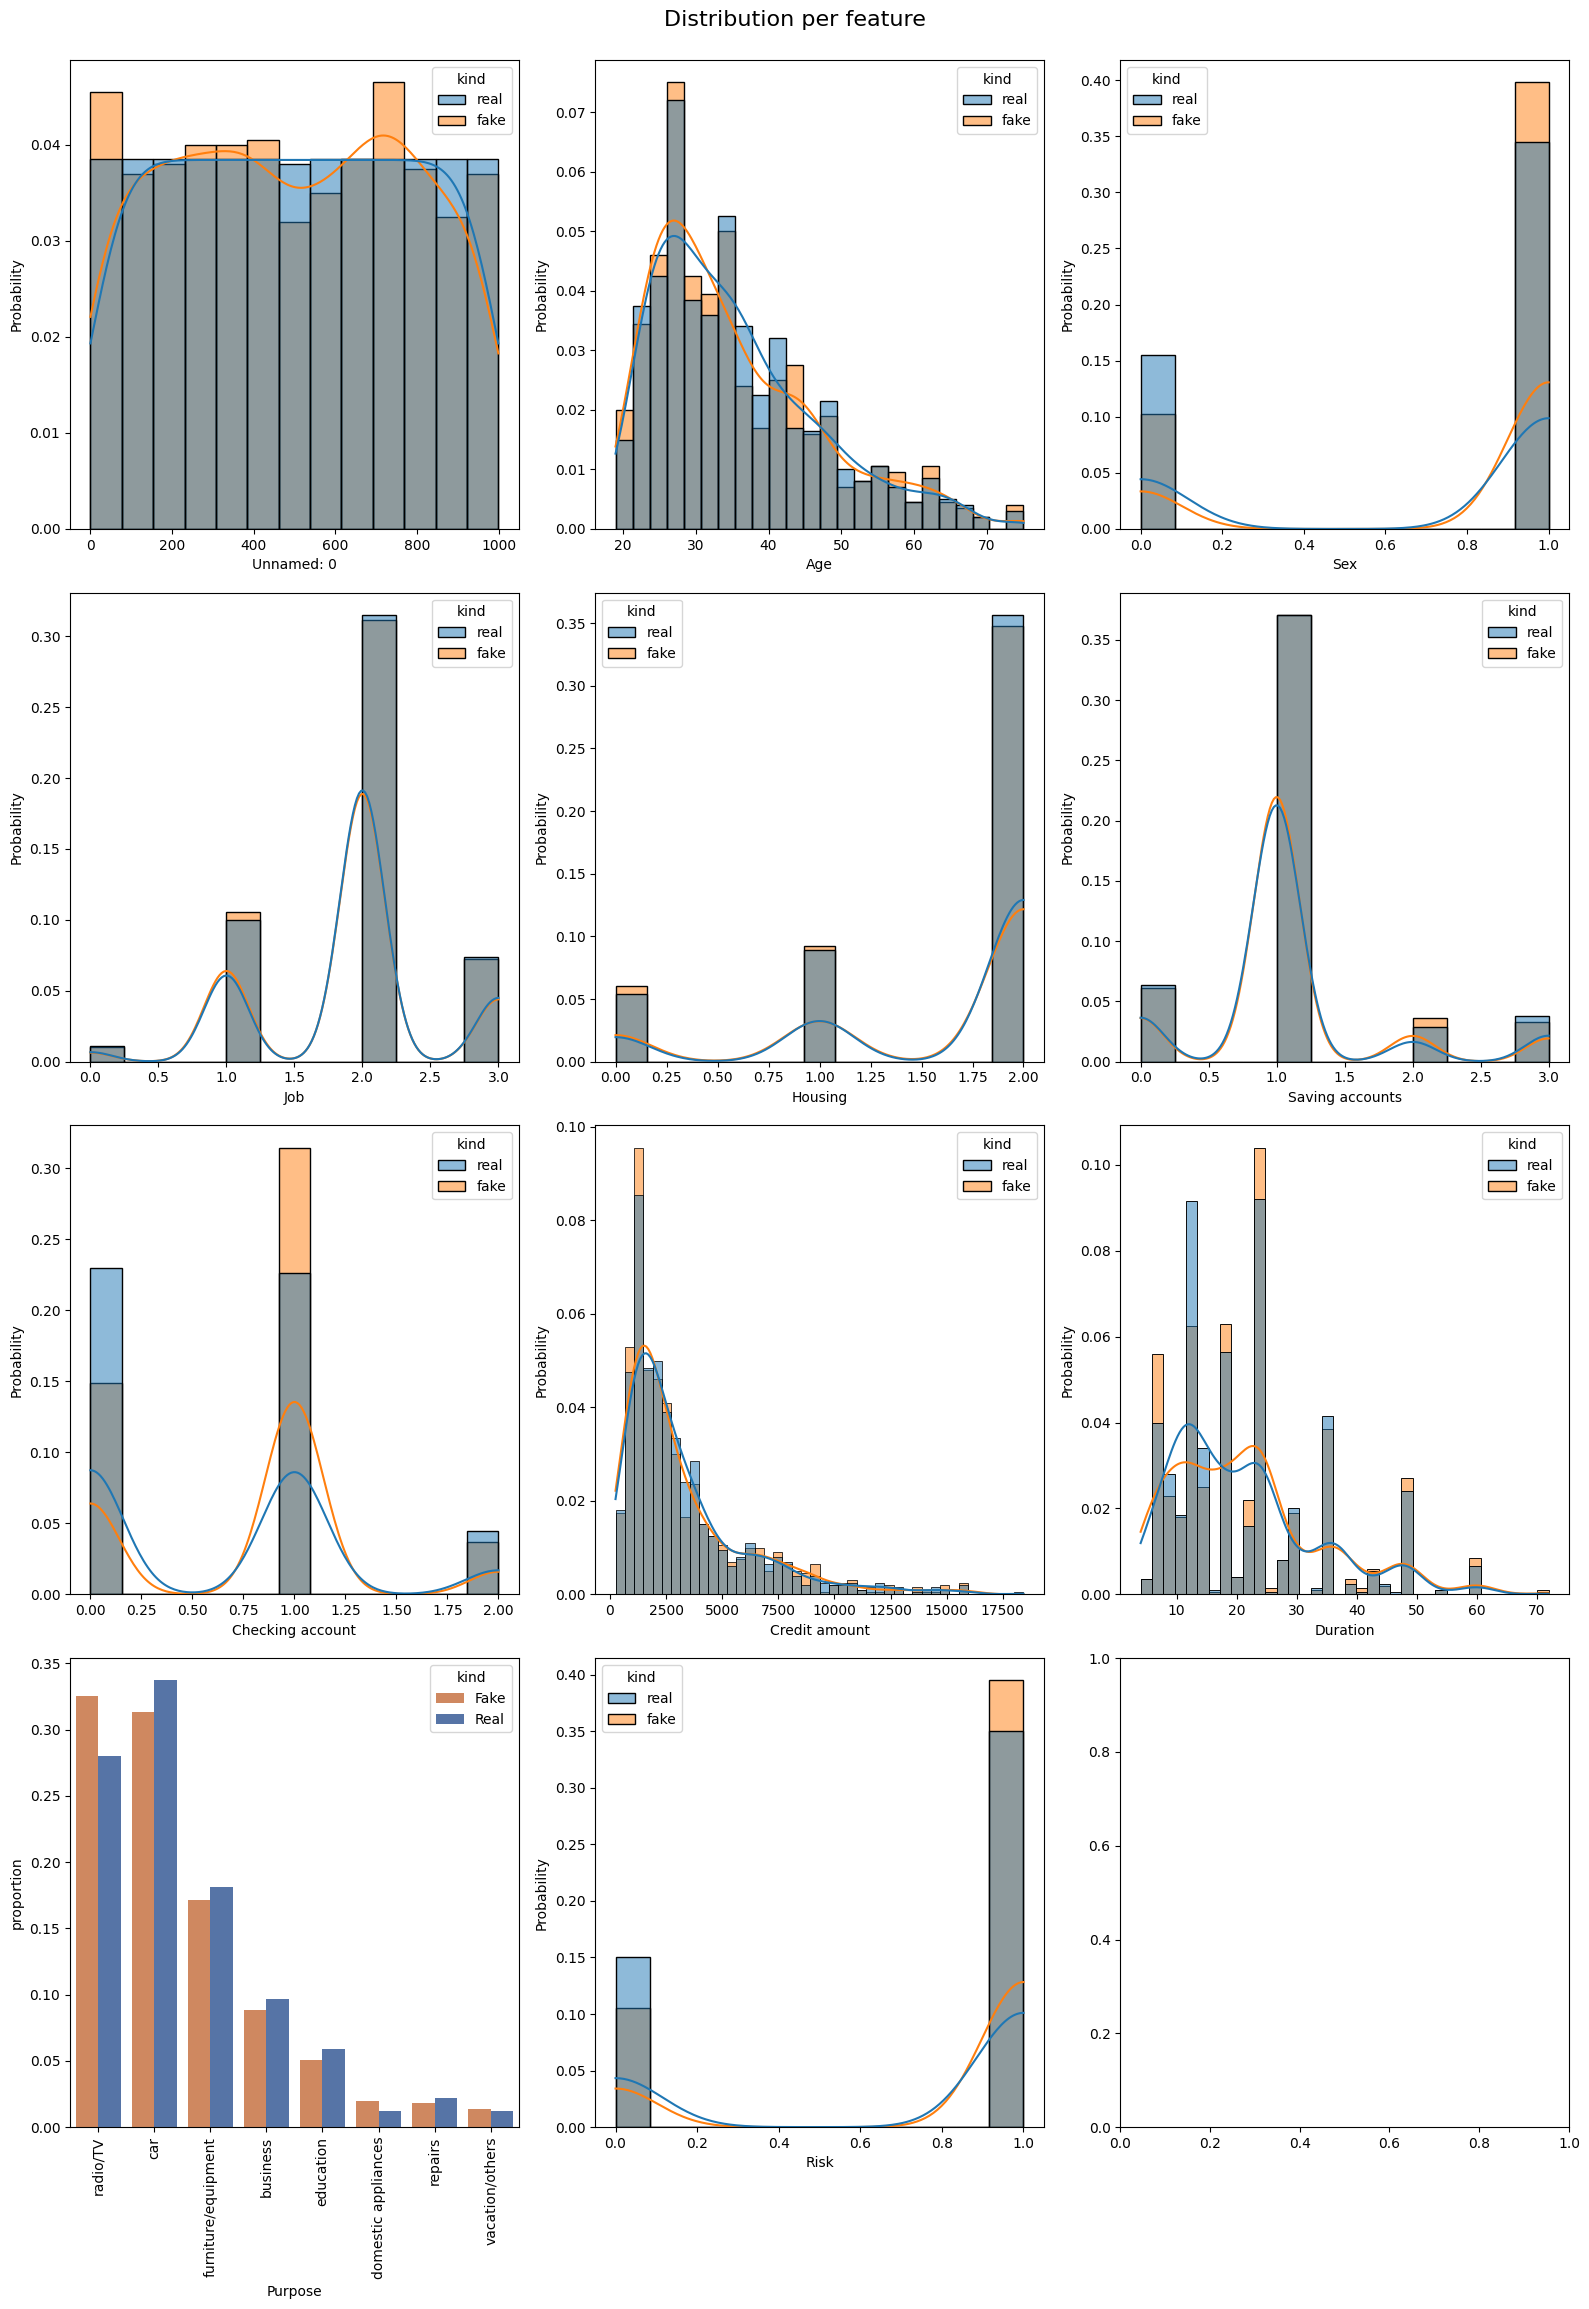

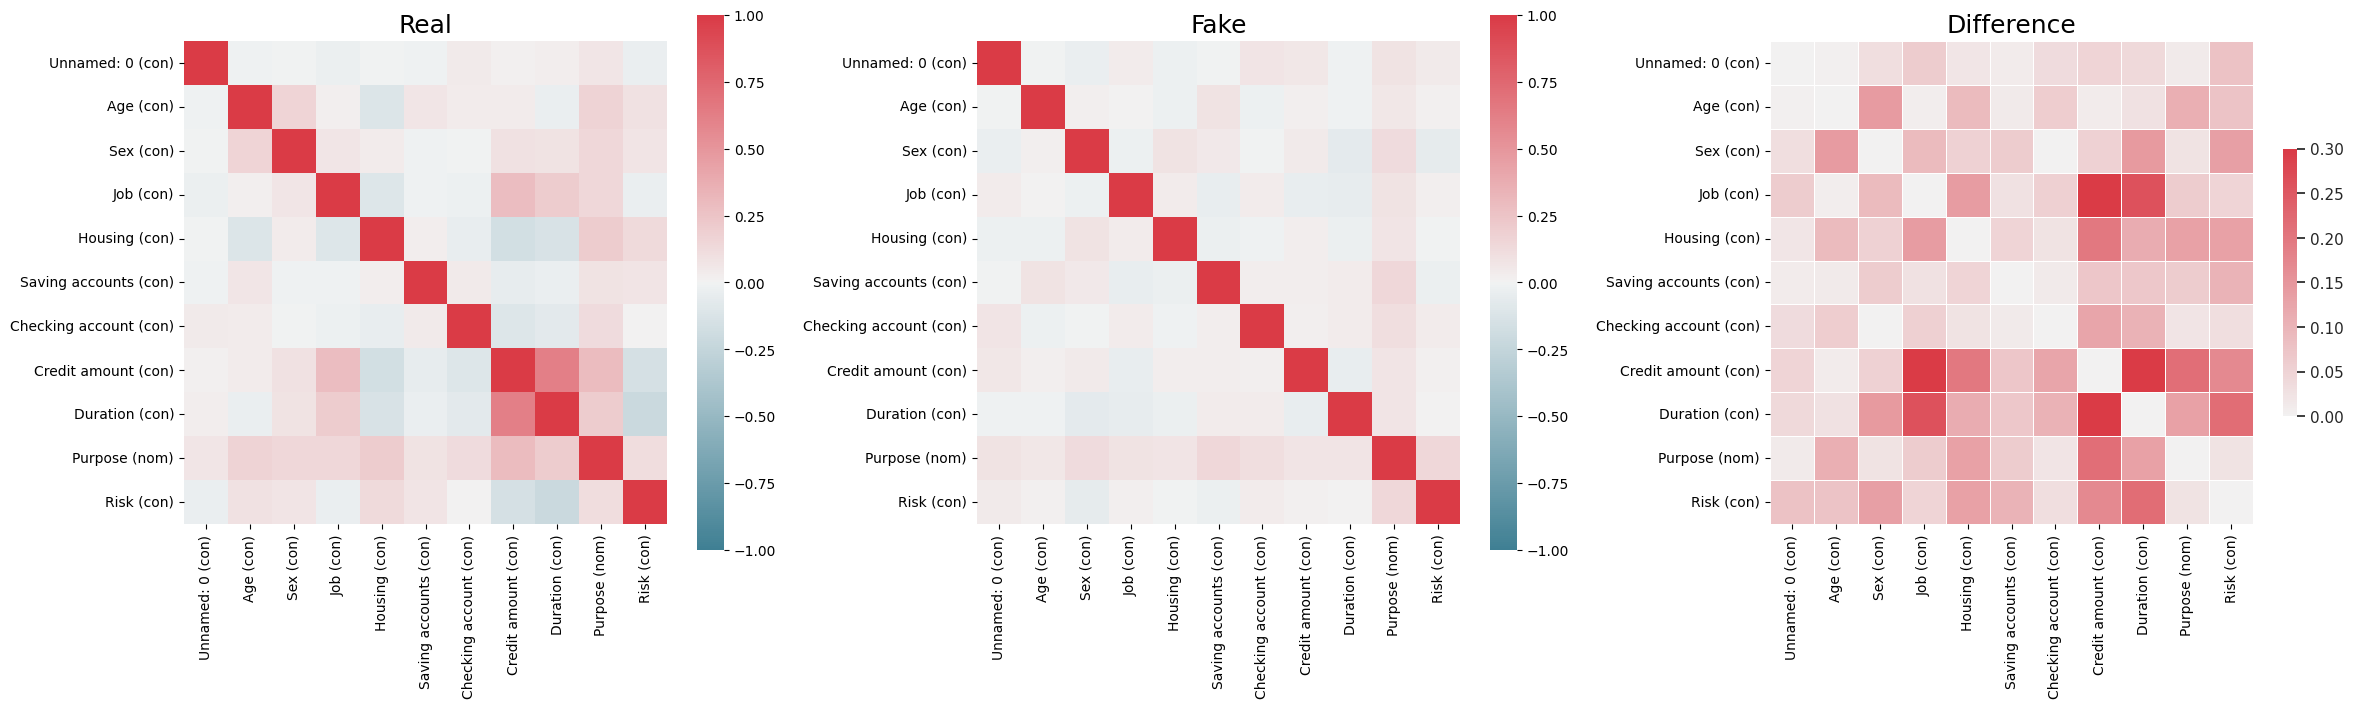

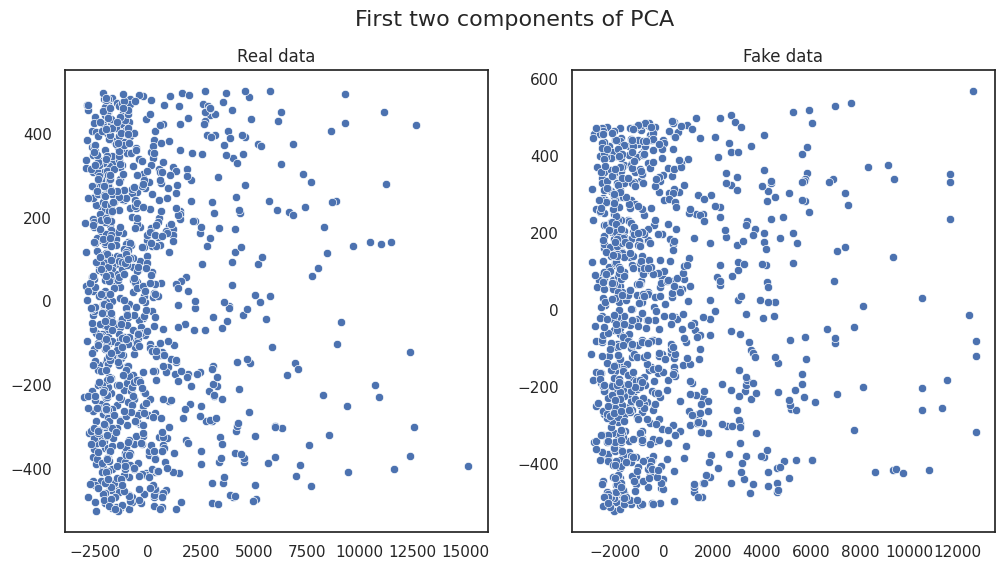

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, synthetic_data.shape)
table_evaluator = TableEvaluator(data, synthetic_data)
table_evaluator.visual_evaluation()

# CTGAN - Loans

In [ ]:
loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,0,90000.0,1,18.01,0,38.0,2001,...,C3,1,1,1,1,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,1,40000.0,0,5.04,0,38.0,1996,...,C1,0,1,1,1,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,1,40000.0,2,21.15,0,28.0,2006,...,D1,0,1,0,1,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,1,30000.0,0,10.16,0,28.0,2007,...,A3,2,1,1,1,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,1,35000.0,1,57.96,0,28.0,2008,...,C3,1,1,1,1,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
loans.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment

In [ ]:
discrete_columns = [
      'emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees'
]

In [ ]:
ctgan = CTGAN(epochs=10)
ctgan.fit(loans, discrete_columns)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
synthetic_loans = ctgan.sample(10000)

In [ ]:
sunthetic_loans

In [ ]:
print(loans.shape, synthetic_loans.shape)
table_evaluator = TableEvaluator(data, synthetic_loans)
table_evaluator.visual_evaluation()

# GAN - Data

In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,NaN,1.0,1169,6,radio/TV,1
1,22,0,2,2,1.0,0.0,5951,48,radio/TV,0
2,49,1,1,2,1.0,0.0,2096,12,education,1
3,45,1,2,0,1.0,1.0,7882,42,furniture/equipment,1
4,53,1,2,0,1.0,1.0,4870,24,car,0


In [ ]:
# Разделение данных на числовые и категориальные
num_cols = ['Age', 'Job', 'Credit amount', 'Duration']
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Нормализация числовых данных
scaler = MinMaxScaler()
num_data = scaler.fit_transform(data[num_cols])

# One-hot кодирование категориальных данных
encoder = OneHotEncoder(sparse=False)
cat_data = encoder.fit_transform(data[cat_cols])

# Объединение данных
processed_data = np.concatenate([num_data, cat_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Определение размера входного слоя
input_dim = processed_data.shape[1]

# Создание генератора
generator = Sequential()
generator.add(Dense(32, input_dim=input_dim))
generator.add(LeakyReLU(alpha=0.01))
generator.add(Dense(input_dim))

# Создание дискриминатора
discriminator = Sequential()
discriminator.add(Dense(32, input_dim=input_dim))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Dense(1, activation='sigmoid'))

# Компиляция дискриминатора
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Создание GAN
discriminator.trainable = False
gan = Sequential([generator, discriminator])

# Компиляция GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [ ]:
def train_gan(gan, generator, discriminator, data, epochs=20000, batch_size=32):
    for epoch in range(epochs):
        # Генерация фейковых данных
        noise = np.random.normal(0, 1, (batch_size, data.shape[1]))
        fake_data = generator.predict(noise)

        # Сбор реальных и фейковых данных
        real_data = data[np.random.randint(0, data.shape[0], batch_size)]
        combined_data = np.concatenate([real_data, fake_data])

        # Метки для данных
        labels = np.zeros(2*batch_size)
        labels[:batch_size] = 0.9  # One-sided label smoothing

        # Обучение дискриминатора
        discriminator.trainable = True
        discriminator.train_on_batch(combined_data, labels)

        # Обучение генератора
        noise = np.random.normal(0, 1, (batch_size, data.shape[1]))
        discriminator.trainable = False
        gan.train_on_batch(noise, np.ones(batch_size))

train_gan(gan, generator, discriminator, processed_data)

In [ ]:
def generate_data(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, generator.input_shape[1]))
    return generator.predict(noise)

new_data = generate_data(generator, 100000)

# GAN - Loans

In [ ]:
loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,0,90000.0,1,18.01,0,38.0,2001,...,C3,1,1,1,1,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,1,40000.0,0,5.04,0,38.0,1996,...,C1,0,1,1,1,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,1,40000.0,2,21.15,0,28.0,2006,...,D1,0,1,0,1,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,1,30000.0,0,10.16,0,28.0,2007,...,A3,2,1,1,1,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,1,35000.0,1,57.96,0,28.0,2008,...,C3,1,1,1,1,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
# Разделение данных на числовые и категориальные
num_cols = ['emp_length', 'homeownership', 'annual_income', 'debt_to_income', 'delinq_2y', 'months_since_last_delinq', 'earliest_credit_line', 'balance', 'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees']
cat_cols = ['emp_title', 'state', 'verified_income', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']

# Нормализация числовых данных
scaler = MinMaxScaler()
num_data = scaler.fit_transform(loans[num_cols])

# One-hot кодирование категориальных данных
encoder = OneHotEncoder(sparse=False)
cat_data = encoder.fit_transform(loans[cat_cols])

# Объединение данных
processed_data = np.concatenate([num_data, cat_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Определение размера входного слоя
input_dim = processed_data.shape[1]

# Создание генератора
generator = Sequential()
generator.add(Dense(32, input_dim=input_dim))
generator.add(LeakyReLU(alpha=0.01))
generator.add(Dense(input_dim))

# Создание дискриминатора
discriminator = Sequential()
discriminator.add(Dense(32, input_dim=input_dim))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Dense(1, activation='sigmoid'))

# Компиляция дискриминатора
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Создание GAN
discriminator.trainable = False
gan = Sequential([generator, discriminator])

# Компиляция GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [ ]:
def train_gan(gan, generator, discriminator, loans, epochs=20000, batch_size=32):
    for epoch in range(epochs):
        # Генерация фейковых данных
        noise = np.random.normal(0, 1, (batch_size, loans.shape[1]))
        fake_data = generator.predict(noise)

        # Сбор реальных и фейковых данных
        real_data = loans[np.random.randint(0, loans.shape[0], batch_size)]
        combined_data = np.concatenate([real_data, fake_data])

        # Метки для данных
        labels = np.zeros(2*batch_size)
        labels[:batch_size] = 0.9  # One-sided label smoothing

        # Обучение дискриминатора
        discriminator.trainable = True
        discriminator.train_on_batch(combined_data, labels)

        # Обучение генератора
        noise = np.random.normal(0, 1, (batch_size, loans.shape[1]))
        discriminator.trainable = False
        gan.train_on_batch(noise, np.ones(batch_size))

train_gan(gan, generator, discriminator, processed_data)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step


In [ ]:
def generate_data(generator, n_samples):
    noise = np.random.normal(0, 1, (n_samples, generator.input_shape[1]))
    return generator.predict(noise)

loan_data = generate_data(generator, 1000000)